In [3]:
#importing requests library
import requests

In [2]:
#importing pandas
import pandas as pd

/Users/emendenhall/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [6]:
# Need to call in the csv file from the CFPB 
# Link to data download : https://files.consumerfinance.gov/ccdb/complaints.csv.zip
# File is downloaded and saved as a CSV. 

#Need to call in the csv to match with the CFPB csv

df = pd.read_csv('complaints.csv')
df_pres = pd.read_csv('presidents_year.csv')

/Users/emendenhall/.pyenv/versions/3.8.10/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
#Learning about the data by first looking at the column names and the data types. 
#It appears that everything is reading in as an object, except the ID. 
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [15]:
#Same here, learning about the data by taking a look at the columns and the data types of each.
df_pres.dtypes

year                            int64
presidential_administration    object
dtype: object

In [16]:
# Looking to see how the data looks as an example for each column.  Just pulling one row as an example. 
df.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,186XX,NaN,Consent not provided,Web,2019-06-13,Closed with explanation,Yes,NaN,3274605


In [22]:
#Because I cannot see the entirety of the row information in the above example, I am taking a look at the 
# unique values of the rows.  

df.Product.unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Checking or savings account', 'Credit card or prepaid card',
       'Debt collection', 'Mortgage',
       'Money transfer, virtual currency, or money service',
       'Student loan', 'Payday loan, title loan, or personal loan',
       'Vehicle loan or lease', 'Bank account or service',
       'Credit reporting', 'Credit card', 'Other financial service',
       'Money transfers', 'Payday loan', 'Consumer Loan', 'Prepaid card',
       'Virtual currency'], dtype=object)

In [40]:
# df['Sub-product'].unique()
# The arrays of the row values that get printed are difficult to understand in the format that is the default. 
# Transitioning them into verticle lists so I can read them. 
# Referenced this URL: https://www.codegrepper.com/code-examples/python/python+print+array+vertically 

print(*df['Sub-product'].unique(), sep = '\n')

Credit reporting
Checking account
Other personal consumer report
Store credit card
I do not know
Conventional home mortgage
General-purpose prepaid card
General-purpose credit card or charge card
FHA mortgage
Government benefit card
Credit card debt
Credit repair services
Mobile or digital wallet
Private student loan
Installment loan
VA mortgage
Loan
Other debt
Other banking product or service
Medical debt
Other type of mortgage
Other mortgage
Personal line of credit
Federal student loan servicing
International money transfer
Other bank product/service
Conventional fixed mortgage
Payday loan debt
Private student loan debt
Lease
Federal student loan debt
Credit card
Other (i.e. phone, health club, etc.)
nan
Payday loan
Home equity loan or line of credit (HELOC)
Conventional adjustable mortgage (ARM)
Auto debt
Mortgage debt
CD (Certificate of Deposit)
Reverse mortgage
Title loan
Savings account
Domestic (US) money transfer
Medical
Virtual currency
Check cashing service
Refund anticipatio

In [41]:
#df.Product.unique() 

print(*df['Product'].unique(), sep = '\n')

Credit reporting, credit repair services, or other personal consumer reports
Checking or savings account
Credit card or prepaid card
Debt collection
Mortgage
Money transfer, virtual currency, or money service
Student loan
Payday loan, title loan, or personal loan
Vehicle loan or lease
Bank account or service
Credit reporting
Credit card
Other financial service
Money transfers
Payday loan
Consumer Loan
Prepaid card
Virtual currency


In [42]:
print(*df['Issue'].unique(), sep = '\n')

Incorrect information on your report
Managing an account
Problem with a company's investigation into an existing issue
Fees or interest
Attempts to collect debt not owed
Trouble during payment process
Problem with a credit reporting company's investigation into an existing problem
Trouble using the card
Problem with a purchase shown on your statement
Applying for a mortgage or refinancing an existing mortgage
Getting a credit card
Threatened to contact someone or share information improperly
Improper use of your report
Confusing or misleading advertising or marketing
Struggling to pay mortgage
Problem adding money
Struggling to repay your loan
Problem when making payments
Managing the loan or lease
Took or threatened to take negative or legal action
Getting the loan
Written notification about debt
Problem with a lender or other company charging your account
Problem with fraud alerts or security freezes
Loan servicing, payments, escrow account
Unable to get your credit report or credit 

In [43]:
print(*df['Sub-issue'].unique(), sep = '\n')

Information belongs to someone else
Account status incorrect
Problem accessing account
Difficulty submitting a dispute or getting information about a dispute over the phone
Charged too much interest
Debt is not yours
nan
Was not notified of investigation status or results
Deposits and withdrawals
Problem with direct deposit
Account information incorrect
Old information reappears or never goes away
Funds not handled or disbursed as instructed
Credit card company isn't resolving a dispute about a purchase on your statement
Problem getting a working replacement card
Problem using the card to withdraw money from an ATM
Contacted your employer
Credit inquiries on your report that you don't recognize
Problem with fees
Can't get other flexible options for repaying your loan
Talked to a third-party about your debt
Problem using a debit or ATM card
Billing problem
Debt was paid
Threatened to sue you for very old debt
Their investigation did not fix an error on your report
Didn't receive notice 

In [57]:
# This is a cell that holds the entirety of the cumsumer complaint in paragraph form.  
# This might be one that we want to do some word analysis on later on in this project

#print(*df['Consumer complaint narrative'].unique(), sep = '\n')

In [58]:
# Just to see one example 
df['Consumer complaint narrative'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Consumer complaint narrative, dtype: object

In [77]:
# I see that there are a lot of NAN values in this column. 
# Checking to see how many there are compared to the total count.
# Referenced this URL: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

print(df['Consumer complaint narrative'].isna().sum())
print(df['Consumer complaint narrative'].count())

# Does .count() account for NA values? No. Only counts Non-null values (https://kanoki.org/2020/03/09/how-to-use-pandas-count-and-value_counts/)  

1409058
737063


In [85]:
# "{:,}".format(df.shape)   
# Not sure what I am doing incorrectly here. 
#I'm trying to get it to print the output with commas. 

In [88]:
#making sure that the NaN and the other values I have now are adding up.
print(1409058 + 737063)
print(df.shape)

2146121
(2146121, 18)


In [89]:
#Taking a look at the various companies that are involved in complaints
print(*df['Company'].unique(), sep = '\n')

CAPITAL ONE FINANCIAL CORPORATION
TRANSUNION INTERMEDIATE HOLDINGS, INC.
WELLS FARGO & COMPANY
LEXISNEXIS
SYNCHRONY FINANCIAL
ERC
FLAGSTAR BANK, FSB
EQUIFAX, INC.
FIFTH THIRD FINANCIAL CORPORATION
Comerica
Experian Information Solutions Inc.
JPMORGAN CHASE & CO.
S&S Physician Services, Inc.
PHH Mortgage Services Corporation
CITIBANK, N.A.
BANK OF AMERICA, NATIONAL ASSOCIATION
Harvest Credit Management VII, LLC
John C. Heath, Attorney at Law, PLLC
SELECT PORTFOLIO SERVICING, INC.
PNC Bank N.A.
Navient Solutions, LLC.
FRANKLIN FIRST FINANCIAL, LTD
DISCOVER BANK
NAVY FEDERAL CREDIT UNION
Westlake Services, LLC
NRA Group, LLC
Resurgent Capital Services L.P.
TIAA, FSB
CARRINGTON MORTGAGE SERVICES, LLC
SUNTRUST BANKS, INC.
Asset Management Outsourcing, Inc.
KEYCORP
GOLD KEY CREDIT, INC.
SUNRISE CREDIT SERVICES, INC
ALLY FINANCIAL INC.
Alliance Data Card Services
Ditech Financial LLC
Real Time Group, Inc.
HUNTINGTON NATIONAL BANK, THE
RUSHMORE LOAN MANAGEMENT SERVICES LLC
AES/PHEAA
National C

Vinci Law Office, LLC
Total Loan Company, LLC
Capital Recovery Systems, Inc.
REPUBLIC MORTGAGE HOME LOANS, LLC
Gragil Associates, Inc.
General Financial, Inc.
First Home Equity Loans,LLC
Midwest Acceptance Corp.
Creditor Advocates Inc
Credit Technology, Inc.
Local Data Recovery, LLC
DRS Financial LLC
MST Financial Services, L.L.C.
Bay Equity LLC
Interstate Recovery Service, Inc.
Carma Enterprises Inc
Co-Operative Adjustment Bureau, Inc.
Shermeta Law Group, PLLC
AG AH LLC
CITYWIDE HOME LOANS
General Business Recoveries, Inc.
Consumer Solutions Group
Law Offices of Timothy E. Baxter & Associates, P.C.
McKenzie Paul & Associates
ATHAS CAPITAL GROUP, INC.
ABR Recovery Services LLC.
WMC MORTGAGE, LLC
THE MONEY HOUSE, INC.
Credit Service International Corp
Southern Oregon Credit Service, Inc.
Nelson Cruz & Associates LLC
Account Management Services, Inc.
Norwich Commercial Group, Inc.
Mary Jane M. Elliott, P.C. Attorneys At Law
LoanHero, Inc
Auto Now Financial Services, Inc., Phoenix, AZ Bra

Jet Cash Funding Inc.
Nae-Mo Corp dba Matthews & Michaels
CFG FINANCIAL SOLUTIONS INC.
Roosen, Varchetti & Olivier, PLLC
FIRST CASH FINANCIAL SERVICES, INC.
Century Credit & Collections, LLC
Biltmore Asset Management LLC
Schreiber Law LLC
Brown and Joseph, Ltd
Manley Deas & Kochalski LLC
The Law Offices of Gregory Alexandrides, LLC
Stewart, Zlimen & Jungers, Attorneys, Ltd.
Lend You Cash, Inc
Crow Creek Sioux Tribe
CMCS, Inc. DBA Central Mercantile Collection Services
New Direction, Inc
Affiliated Creditors, Inc.
Alternative Finance Company, LLC
Moxley & Associates, LLC
Access Financial LLC
ACXIOM CORP.
Robinson & Hoover
Origen Capital Investments II, LLC
Ogden Holdings, LLC
Evergreen Financial Services Inc.
Greentree & Associates
J&D Recovery, Inc.
Debt Relief Center
Infinity Home Lending
Clearview Resolution Services
Broder Credit & Collection Service
FlexShopper, Inc
CALCON MUTUAL MORTGAGE LLC DBA ONETRUST HOME LOANS
Xapo, Inc.
Grandview Financial Services Inc.
ALCOVA MORTGAGE LLC
N

M3 Mortgage Specialists, Inc
Panhandle-Plains Student Finance Corporation
General Acceptance LLC
PRESTAMOS RAPIDITOS
Mezu, Inc
E Z CASH OF DELAWARE, INC.
Professional Receivable Solutions
COMPASS MORTGAGE, INC.
Credit Adjustment, Inc
Advanced Call Center Technologies, LLC
West Penn Financial Service Center, Inc.
HARRIS, KLEIN ASSOCIATIES, INC.
EQUITY RESOURCES, INCORPORATED
Schneiderman & Sherman P.C.
BATON ROUGE FINANCIAL SERVICES, L.L.C.
Aspen Properties Group, LLC
GLFinancial Services LLC
JKS Mortgage, LLC
Graystone Funding Company, LLC
Creditor Claims of America, Inc.
Law Offices of Frank J. Maier & Associates
1st United Funding, LLC
TFC Group, LLC
The Law Offices of Richard W. Krieg, LLC
Victor, Inc.
CENTURION IV LLC
First Premier Financial, Inc.
Southern Service Systems, Inc.
Credit Advisors Foundation
America’s Financial Choice, Inc.
Regional Mediation Associates LLC
MCGLONE MORTGAGE COMPANY, INC.
Bonded Business Services, Ltd.
Accurate Financial Services
D.B.F. COLLECTION CORP.

RMCN Credit Services, Inc.
Volunteer Mortgage Inc
Luper Neidenthal & Logan, A Legal Professional Association
Harris Beach PLLC
Welts, White & Fontaine, P.C.
Accelerated Revenue, Inc.
American 1st Rate Mortgage, LLC
HAC Holding Inc.
Lowther Johnson Attorneys at Law, LLC
All American Title Co., Inc
The Westmoore Group, LLC
The Grimes Legal Group, LLC
Clear Title Solutions, Inc.
William A. Hecht, P.C.
Lakeland West Capital LLC
Logan View LLC
LoanNow, LLC  (Closed)
Credit Bureau of Twin Falls Inc
PEARL LOANS INC
Innovative Strategic Solutions
FINANCIAL FREEDOM MORTGAGE INC
Sindeo, Inc.
Charlottesville Settlement Company
Xpress Cash Management, LLC
CRESCENT MORTGAGE COMPANY
Seashine Financial, LLC
CNG Investments, Inc
North Capital Recovery Services
COMMONWEALTH MORTGAGE, LLC
IVAN BROWN
Keypoint Mortgage, LLC
James W. Crocker, PC
Security Credit Corporation
Georgia Receivables, Inc.
Consumer Receivables Management LLC
Mid-American Financial Group, Inc
Henry Andrew Schmidt III
Asset One Mort

In [91]:
# Looking at the 20 companies with the most complaints against them. 
df.Company.value_counts().head(20)

EQUIFAX, INC.                             288034
TRANSUNION INTERMEDIATE HOLDINGS, INC.    246820
Experian Information Solutions Inc.       235798
BANK OF AMERICA, NATIONAL ASSOCIATION     102421
WELLS FARGO & COMPANY                      87005
JPMORGAN CHASE & CO.                       79427
CITIBANK, N.A.                             66831
CAPITAL ONE FINANCIAL CORPORATION          54976
Navient Solutions, LLC.                    34515
SYNCHRONY FINANCIAL                        32253
Ocwen Financial Corporation                31229
U.S. BANCORP                               24926
NATIONSTAR MORTGAGE                        24027
AMERICAN EXPRESS COMPANY                   20220
PNC Bank N.A.                              17601
PORTFOLIO RECOVERY ASSOCIATES INC          16969
ENCORE CAPITAL GROUP INC.                  15826
DISCOVER BANK                              15816
Ditech Financial LLC                       14953
TD BANK US HOLDING COMPANY                 14934
Name: Company, dtype

In [92]:
#importing matplotlib 
import matplotlib.pyplot as plt

<AxesSubplot:>

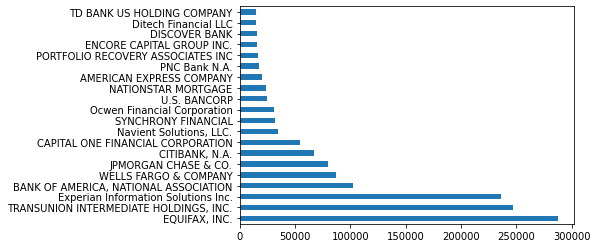

In [93]:
# Looking at the data visually in bar chart form to get an idea of scale. 
# The companies that have the absolutely greatest amount of complaints are the credit companies.  
# Exported this data into an excel: https://docs.google.com/spreadsheets/d/1qXBvxcShVYt7H8y8d9RBGEzLpLakjvMbNU3omRo7Yuw/edit?usp=sharing 
# Created a graph via DataWrapper : 

df.Company.value_counts().head(20).plot.barh()

In [ ]:
print(*df['Consumer complaint narrative'].unique(), sep = '\n')

In [ ]:
print(*df['Consumer complaint narrative'].unique(), sep = '\n')

In [ ]:
print(*df['Consumer complaint narrative'].unique(), sep = '\n')

In [30]:
# Convert the Date Received column to datetime rather then object data type so that I can sort 
# and understand them numerically.
#Referenced this webpage: https://www.geeksforgeeks.org/python-pandas-to_datetime/ 
#Testing first to see if this correctly converts the column to datetime. Then will run below to convert permanently.
# df["Date received"]= pd.to_datetime(df["Date received"])

print(pd.to_datetime(df["Date received"]))

0         2019-06-13
1         2019-04-01
2         2021-04-06
3         2019-06-12
4         2019-09-03
             ...    
2146116   2017-02-09
2146117   2015-04-29
2146118   2017-03-31
2146119   2017-01-16
2146120   2018-03-07
Name: Date received, Length: 2146121, dtype: datetime64[ns]


In [31]:
# Can see that in the above test, the conversion to datetime worked, so I'm writing that into DF permanently.

df["Date received"]= pd.to_datetime(df["Date received"])


In [32]:
#checking data types to see if the change is embedded.

df.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company                    object
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
dtype: object

In [63]:
# importing Numpy

import numpy as np